# CSE 469 Project
Team Member 1: Jyothismaria Joseph (jyothism@buffalo.edu)
Team Member 2: Ibrahim Allahbuksh (iallahbu@buffalo.edu)
Team Member 3: Cailey Shum (caileysh@buffalo.edu)

## Introduction
### Problem: 
   Using classification to determine how strong a bad password is based on time it takes to crack online and offline. 

### Impact: 
   To determine the strongest passwords within the dataset and associate which ones are the best and worst.

## Formulation
Expected output from this dataset should be a decision tree. It should return whether or not the password is weak, medium, or strong in password strength.

## Datasets
Dataset provided by Kaggle.com
https://www.kaggle.com/datasets/sujaykapadnis/bad-passwords-never-use-them

## Data Pre-Processing

* For pre-processing, we turned categories into features, dropping missing values, and standardizing time unit into minutes.

In [2]:
#Importing libraries 
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df_pswd = pd.read_csv("passwords.csv")

In [5]:
#Cleaning
#Removing missing values
#Removing wrong entries in strength
df_pswd.isna().sum()

rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
dtype: int64

In [6]:
#dropping the rows that have missing value
rows = list(df_pswd[df_pswd["strength"].isna()].index)
df_pswd = df_pswd.drop(rows)

In [7]:
#strength supposed to be from 1 to 10 any values other than that need to be removed
df_pswd["strength"].describe()

count    500.000000
mean       7.432000
std        5.415536
min        0.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       48.000000
Name: strength, dtype: float64

In [8]:
rows = list(df_pswd[df_pswd["strength"] > 10].index)
df_pswd = df_pswd.drop(rows)

In [9]:
# categorizing strength into 3 categories 
# 0 -> weak
# 1 -> medium
# 2 -> strong
strength_bin = []
strength = list(df_pswd["strength"])
for x in strength:
    if(x >= 0 and x <= 3):
        strength_bin.append(0)
    elif(x >= 4 and x <= 7):
        strength_bin.append(1)
    elif(x >= 8 and x <= 10):
        strength_bin.append(2)
df_pswd["strength_bin"] = strength_bin
df_pswd

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size,strength_bin
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0,2
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0,1
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0,1
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0,1
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0,2
...,...,...,...,...,...,...,...,...,...,...
494,495.0,hotrod,cool-macho,3.72,days,3.210000e-03,497.0,7.0,11.0,1
495,496.0,reddog,cool-macho,3.72,days,3.210000e-03,498.0,6.0,10.0,1
496,497.0,alexande,name,6.91,years,2.170000e+00,499.0,9.0,12.0,2
497,498.0,college,nerdy-pop,3.19,months,8.350000e-02,500.0,7.0,11.0,1


In [10]:
df_pswd["time_unit"].unique()

array(['years', 'minutes', 'days', 'seconds', 'months', 'hours', 'weeks'],
      dtype=object)

In [11]:
#standardizing the time units for value to mins
#using standard values for time:
# 1 year = 525600 mins
# 1 day = 1440 min
# 1 month = 43800
# 1 week = 10080
# 1 sec = 1/60 min
online_attack = []
offline_attack = []
df_online = list(df_pswd["value"])
df_offline = list(df_pswd["offline_crack_sec"])
df_time = list(df_pswd["time_unit"])
for i in range(0, len(df_time)):
    if(df_time[i] == 'years'):
        online_attack.append(df_online[i]* 525600)
    elif(df_time[i] == 'days'):
        online_attack.append(df_online[i]* 1440)
    elif(df_time[i] == 'months'):
        online_attack.append(df_online[i]* 43800)
    elif(df_time[i] == 'hours'):
        online_attack.append(df_online[i]* 60)
    elif(df_time[i] == 'weeks'):
        online_attack.append(df_online[i]* 10080)
    elif(df_time[i] == 'seconds'):
        online_attack.append(df_online[i]*(1/60))
    elif(df_time[i] == 'minutes'):
        online_attack.append(df_online[i])
    offline_attack.append(df_offline[i]/60)
df_pswd["online_crack_min"] = online_attack
df_pswd["offline_crack_min"] = offline_attack

In [12]:
#creating a new feature based on password column
password_length = []
for i in list(df_pswd["password"]):
    password_length.append(len(i))
df_pswd["password_length"] = password_length

In [13]:
features = df_pswd.drop(columns= ['value','rank', 'offline_crack_sec', 'rank_alt', 'strength', 'strength_bin','time_unit'], axis =1)
label = df_pswd["strength_bin"]

In [14]:
features

,password,category,font_size,online_crack_min,offline_crack_min,password_length
0,password,password-related,11.0,3.631896e+06,3.616667e-02,8
1,123456,simple-alphanumeric,8.0,1.852000e+01,1.850000e-07,6
2,12345678,simple-alphanumeric,8.0,1.857600e+03,1.850000e-05,8
3,1234,simple-alphanumeric,8.0,1.851667e-01,1.850000e-09,4
4,qwerty,simple-alphanumeric,11.0,5.356800e+03,5.350000e-05,6
...,...,...,...,...,...,...
494,hotrod,cool-macho,11.0,5.356800e+03,5.350000e-05,6
495,reddog,cool-macho,10.0,5.356800e+03,5.350000e-05,6
496,alexande,name,12.0,3.631896e+06,3.616667e-02,8
497,college,nerdy-pop,11.0,1.397220e+05,1.391667e-03,7


In [15]:
label

0      2
1      1
2      1
3      1
4      2
      ..
494    1
495    1
496    2
497    1
498    1
Name: strength_bin, Length: 485, dtype: int64

## Dataset Statistics

## Key Statistics from Password Dataset:
* Most frequent password category in the dataset is ones that involves a name (i.e: Thomas, Robert, Batman), which has a frequency of 35%.
* The average time to crack a password offline is 0.2671227 seconds.
* The average strength of a password on a scale of 1, being the weakest, to 10, being the strongest, is a 6. However, the most frequent password strength in this dataset has a strength of 8.

In [38]:
df_pswd[["category", "offline_crack_sec","strength","online_crack_min", "password_length"]].describe(include="all")

,category,offline_crack_sec,strength,online_crack_min,password_length
count,485,4.850000e+02,485.000000,4.850000e+02,485.000000
unique,10,NaN,NaN,NaN,NaN
top,name,NaN,NaN,NaN,NaN
freq,183,NaN,NaN,NaN,NaN
mean,NaN,2.671227e-01,6.606186,4.470659e+05,6.181443
std,NaN,6.889035e-01,2.307812,1.153012e+06,1.052381
min,NaN,1.110000e-07,0.000000,1.851667e-01,4.000000
25%,NaN,3.210000e-03,6.000000,5.356800e+03,6.000000
50%,NaN,3.210000e-03,7.000000,5.356800e+03,6.000000
75%,NaN,8.350000e-02,8.000000,1.397220e+05,7.000000


Text(0, 0.5, 'Frequency')

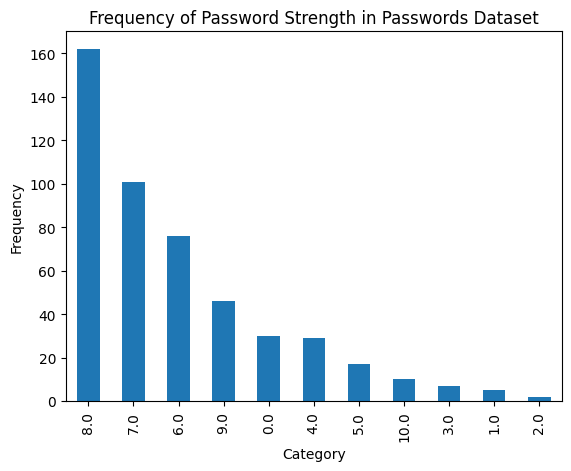

In [36]:
df_pswd["strength"].value_counts().plot(kind ='bar')
plt.title("Frequency of Password Strength in Passwords Dataset")
plt.xlabel("Category")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency Percentage (in decimals)')

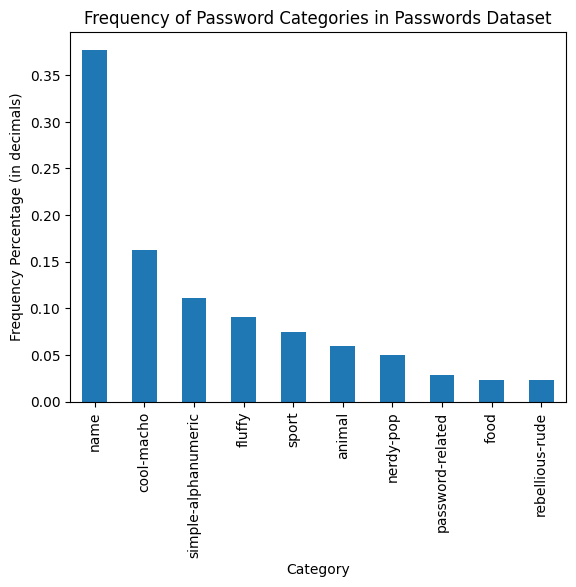

In [33]:
#Frequency of Password Categories in Passwords Dataset
df_pswd["category"].value_counts(normalize="True").plot(kind ='bar')
plt.title("Frequency of Password Categories in Passwords Dataset")
plt.xlabel("Category")
plt.ylabel("Frequency Percentage (in decimals)")

## Algorithm and Experiments

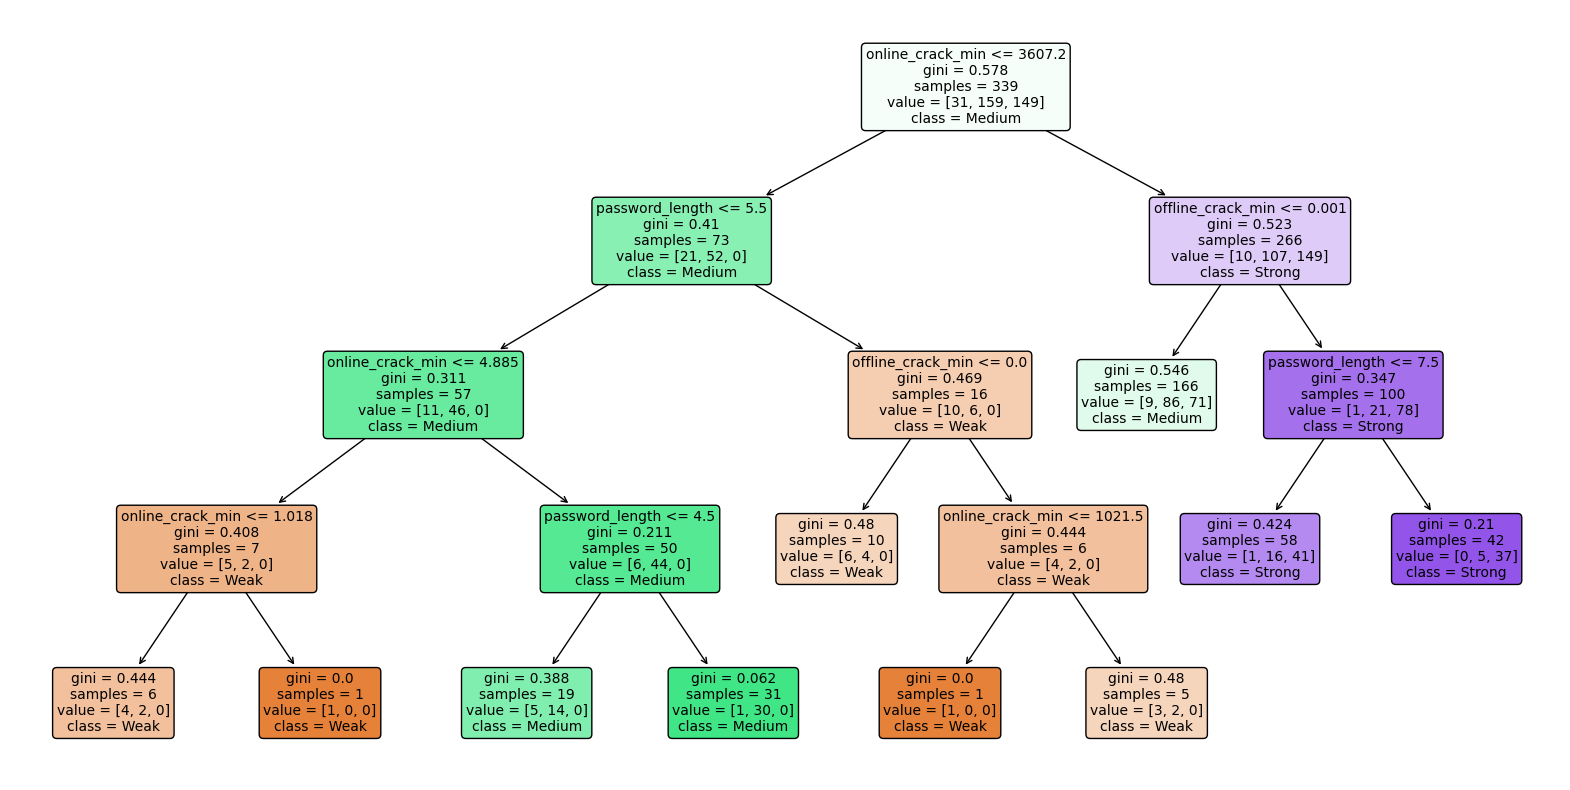

Accuracy: 0.6438356164383562
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.58      0.80      0.67        64
           2       0.79      0.49      0.61        69

    accuracy                           0.64       146
   macro avg       0.66      0.66      0.64       146
weighted avg       0.68      0.64      0.64       146

Confusion Matrix:
[[ 9  3  1]
 [ 5 51  8]
 [ 1 34 34]]


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns



features = df_pswd[['online_crack_min', 'offline_crack_min', 'password_length']]
label = df_pswd['strength_bin']  


X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize=(20,10)) 
plot_tree(clf, 
          feature_names=features.columns,  # This should be the names of your features
          class_names=["Weak", "Medium", "Strong"],
          filled=True, rounded=True,
          fontsize=10)
plt.show()

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


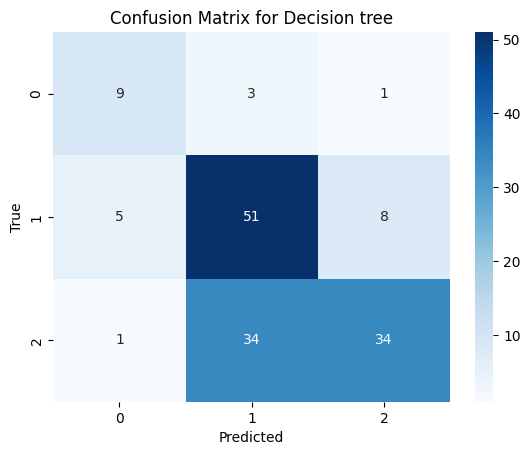

In [22]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Decision tree")
plt.show()